# Email Marketing Campaigns Optimization Model with NLP

### Jupyter Notebook 1/10

#### Overview

- We will try to predict three binary targets: `open_rate_result`, `ctr_result` & `ctor_result` using three supervised classification models.


- We will use a multi-label classification model prior to these three main models to obtain the target `sector`.

#### Steps

1. Importing classes from the module `campaigns`.
2. Obtaining campaign's dataframe.
3. Performing an exploratory analysis & normalizing variables.
4. Feature Engineering (including a multiclass supervised classification problem).
5. Predicting Targets (`open_rate_result`, `ctr_result` & `ctor_result`).
6. Evaluating Performance.
7. Cleaning, preprocessing and transforming new data, and making new predictions.
8. Putting the machine-learning model into production using Streamlit open-source app framework.

## 1. Importing Classes from the module `campaigns`

In [1]:
import sys
sys.path.append('..')


import warnings
warnings.filterwarnings('ignore')

# Get files
from campaigns.getinputdata import CampaignsFileGetInfo

# Exploratory Analysis
from campaigns.eda import ExploratoryDataAnalyser

## 2. Obtaining Campaigns DataFrame

- We will create an instance using the class `CampaignsFileGetInfo`, which automatically drops inactive accounts from the dataframe and adds a column `campaign_id` for future reference.

In [2]:
# Creating an instance

main_model = CampaignsFileGetInfo(dataroot='../../../datasets/input', datafile='campaigns_w_label_sample_01.csv')

In [3]:
main_model.campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99804 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   sender        99804 non-null  int64         
 1   subject       99804 non-null  object        
 2   date_sent     99804 non-null  datetime64[ns]
 3   total_sent    99804 non-null  int64         
 4   customer_cat  99804 non-null  int64         
 5   opens         99804 non-null  int64         
 6   clicks        99804 non-null  int64         
 7   sector        12058 non-null  object        
 8   message       99796 non-null  object        
 9   campaign_id   99804 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 8.4+ MB


## 3.  Performing an exploratory analysis of `campaigns_df` and normalizing numeric variables


#### 3.1. Exploratory Analysis of the main numerical and categorical variables

In [4]:
# Creating an instance

main_model_eda = ExploratoryDataAnalyser(main_model.campaigns_df)

In [5]:
main_model_eda.pre_eda()


Number of observations: 99804

Number of columns: 10

Campaigns Info.:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99804 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   sender        99804 non-null  int64         
 1   subject       99804 non-null  object        
 2   date_sent     99804 non-null  datetime64[ns]
 3   total_sent    99804 non-null  int64         
 4   customer_cat  99804 non-null  int64         
 5   opens         99804 non-null  int64         
 6   clicks        99804 non-null  int64         
 7   sector        12058 non-null  object        
 8   message       99796 non-null  object        
 9   campaign_id   99804 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 8.4+ MB
None

Unique elements per variable:
sender           4152
subject         66322
date_sent       72196
total_sent      23081
customer_cat        5
open

#### Main Categorical Variable

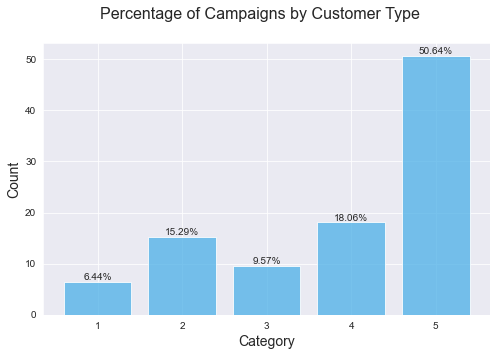

In [6]:
main_model_eda.cats_plotter()

#### Main Continuous Variables

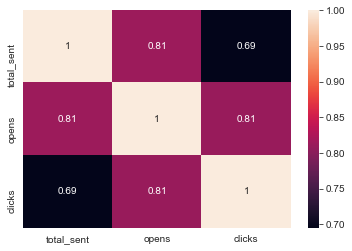

In [7]:
main_model_eda.get_correlation_matrix()

#### Observing data distribution of the continuous variables before applying log transformation

- We will generate additional boxplots and histograms to see the data distribution after using different treatments.

In [8]:
main_model_eda.describe_overall()

Overall Variance:

total_sent   2,511,812,525.40
opens           58,987,519.65
clicks             881,338.74
dtype: float64


,total_sent,opens,clicks
count,"99,804.00","99,804.00","99,804.00"
mean,"11,032.22","1,276.06",135.74
std,"50,117.99","7,680.33",938.80
min,100.00,0.00,0.00
25%,440.00,81.00,3.00
50%,"1,664.00",264.00,20.00
75%,"6,487.25",842.00,74.00
max,"1,557,345.00","533,662.00","84,747.00"


Total Sent Skweness: 16.76
Opens Skweness: 22.05
Clicks Skewness: 33.26


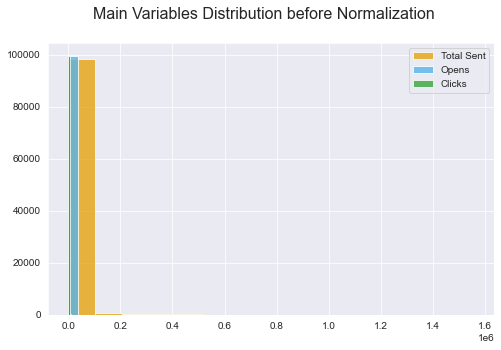

In [9]:
main_model_eda.plot_main_var()

#### Grouping the continous variables using the categorical variable `customer_cat` 

In [10]:
# Observing 'total_sent' distribution before log transformation

main_model_eda.describe_by_cat('total_sent')

Variance:

customer_cat
1   3,793,109,108.36
2   1,895,831,658.06
3     706,568,680.83
4   6,974,386,979.34
5   1,211,572,878.47
Name: total_sent, dtype: float64


,count,mean,std,min,25%,50%,75%,max
customer_cat,,,,,,,,
1,"6,431.00","25,745.78","61,588.22",100.00,250.00,"2,762.00","24,640.50","1,402,478.00"
2,"15,263.00","19,772.91","43,541.15",100.00,737.50,"3,358.00","24,889.00","772,802.00"
3,"9,548.00","10,056.18","26,581.36",100.00,882.00,"3,732.00","9,455.75","868,823.00"
4,"18,020.00","12,114.81","83,512.80",100.00,330.00,"1,488.50","5,991.25","1,557,345.00"
5,"50,542.00","6,318.89","34,807.66",100.00,411.00,"1,207.00","3,924.00","1,460,656.00"


In [11]:
# Observing 'opens' distribution before log transformation

main_model_eda.describe_by_cat('opens')

Variance:

customer_cat
1    3,985,955.93
2    3,912,874.38
3    7,918,034.90
4   98,554,970.69
5   77,928,547.55
Name: opens, dtype: float64


,count,mean,std,min,25%,50%,75%,max
customer_cat,,,,,,,,
1,"6,431.00",658.80,"1,996.49",0.00,11.00,57.00,420.50,"110,464.00"
2,"15,263.00",689.51,"1,978.10",0.00,28.00,140.00,588.00,"42,871.00"
3,"9,548.00","1,023.63","2,813.90",0.00,97.00,339.00,939.00,"61,395.00"
4,"18,020.00","1,509.93","9,927.49",0.00,68.00,247.00,869.00,"277,099.00"
5,"50,542.00","1,496.04","8,827.71",0.00,123.00,318.00,917.00,"533,662.00"


In [12]:
# Observing 'clicks' distribution before log transformation

main_model_eda.describe_by_cat('clicks')

Variance:

customer_cat
1      16,336.60
2      13,920.73
3     114,380.95
4   2,282,743.61
5     892,781.86
Name: clicks, dtype: float64


,count,mean,std,min,25%,50%,75%,max
customer_cat,,,,,,,,
1,"6,431.00",34.13,127.81,0.00,0.00,5.00,28.00,"7,723.00"
2,"15,263.00",45.79,117.99,0.00,1.00,10.00,39.00,"5,178.00"
3,"9,548.00",92.94,338.20,0.00,5.00,22.00,65.00,"7,139.00"
4,"18,020.00",180.33,"1,510.88",0.00,3.00,17.00,75.00,"62,022.00"
5,"50,542.00",168.03,944.87,0.00,6.00,28.00,97.00,"84,747.00"


#### Log transformation

Total Sent Skweness: 0.45
Opens Skweness: -0.10
Clicks Skewness: 0.17


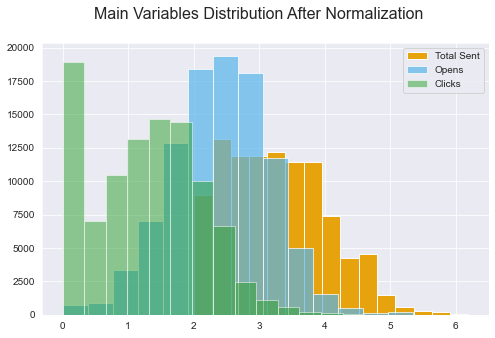

In [13]:
main_model_eda.log_normalize()

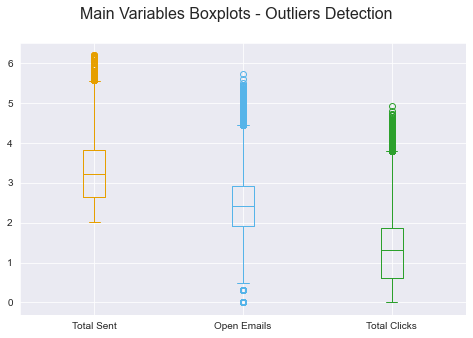

In [14]:
main_model_eda.plot_outliers()

In [15]:
total_sent_lower_bound, total_sent_upper_bound = main_model_eda.detect_outliers('total_sent')
opens_lower_bound,opens_upper_bound = main_model_eda.detect_outliers('opens')
clicks_lower_bound, clicks_upper_bound = main_model_eda.detect_outliers('clicks')


Outliers:
388

Outliers:
1131

Outliers:
245


#### Handling outliers

In [16]:
main_model_eda.handle_outliers('total_sent', total_sent_lower_bound, total_sent_upper_bound)

Mean value after outliers treatment: 3.27


In [17]:
main_model_eda.handle_outliers('opens', opens_lower_bound, opens_upper_bound)

Mean value after outliers treatment: 2.41


In [18]:
main_model_eda.handle_outliers('clicks', clicks_lower_bound, clicks_upper_bound)

Mean value after outliers treatment: 1.28


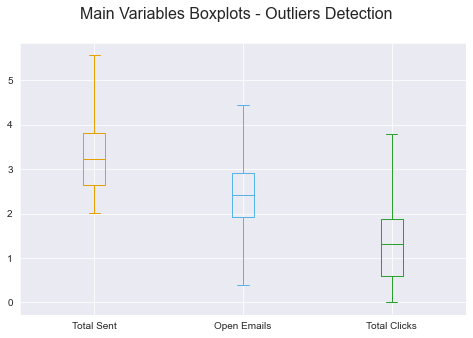

In [19]:
main_model_eda.plot_outliers()

In [20]:
main_model_eda.detect_outliers('total_sent')


Outliers:
0


(0.8929051120065765, 5.563661051903275)

In [21]:
main_model_eda.detect_outliers('opens')


Outliers:
0


(0.39579326902217815, 4.443848157986281)

In [22]:
main_model_eda.detect_outliers('clicks')


Outliers:
0


(-1.3074419167676439, 3.7845631714873065)

#### Observing data distribution of the continuous variables after applying log transformation

In [23]:
main_model_eda.describe_overall()

Overall Variance:

total_sent   0.59
opens        0.55
clicks       0.69
dtype: float64


,total_sent,opens,clicks
count,"99,804.00","99,804.00","99,804.00"
mean,3.27,2.41,1.28
std,0.77,0.74,0.83
min,2.00,0.40,0.00
25%,2.64,1.91,0.60
50%,3.22,2.42,1.32
75%,3.81,2.93,1.88
max,5.56,4.44,3.78


#### Grouping the continous variables using the categorical variable `customer_cat` 

In [24]:
# Observing 'total_sent' distribution after log transformation

main_model_eda.describe_by_cat('total_sent')

Variance:

customer_cat
1   0.95
2   0.75
3   0.52
4   0.57
5   0.44
Name: total_sent, dtype: float64


,count,mean,std,min,25%,50%,75%,max
customer_cat,,,,,,,,
1,"6,431.00",3.51,0.98,2.00,2.40,3.44,4.39,5.56
2,"15,263.00",3.60,0.87,2.00,2.87,3.53,4.40,5.56
3,"9,548.00",3.47,0.72,2.00,2.95,3.57,3.98,5.56
4,"18,020.00",3.19,0.76,2.00,2.52,3.17,3.78,5.56
5,"50,542.00",3.13,0.66,2.00,2.61,3.08,3.59,5.56


In [25]:
# Observing 'opens' distribution after log transformation

main_model_eda.describe_by_cat('opens')

Variance:

customer_cat
1   0.91
2   0.67
3   0.51
4   0.52
5   0.41
Name: opens, dtype: float64


,count,mean,std,min,25%,50%,75%,max
customer_cat,,,,,,,,
1,"6,431.00",1.90,0.95,0.40,1.08,1.76,2.62,4.44
2,"15,263.00",2.14,0.82,0.40,1.46,2.15,2.77,4.44
3,"9,548.00",2.46,0.71,0.40,1.99,2.53,2.97,4.44
4,"18,020.00",2.40,0.72,0.40,1.84,2.39,2.94,4.44
5,"50,542.00",2.54,0.64,0.40,2.09,2.50,2.96,4.44


In [26]:
# Observing 'clicks' distribution after log transformation

main_model_eda.describe_by_cat('clicks')

Variance:

customer_cat
1   0.58
2   0.58
3   0.55
4   0.70
5   0.71
Name: clicks, dtype: float64


,count,mean,std,min,25%,50%,75%,max
customer_cat,,,,,,,,
1,"6,431.00",0.86,0.76,0.00,0.00,0.78,1.46,3.78
2,"15,263.00",1.03,0.76,0.00,0.30,1.04,1.60,3.71
3,"9,548.00",1.31,0.74,0.00,0.78,1.36,1.82,3.78
4,"18,020.00",1.27,0.84,0.00,0.60,1.26,1.88,3.78
5,"50,542.00",1.41,0.84,0.00,0.85,1.46,1.99,3.78


#### Parallel boxplots

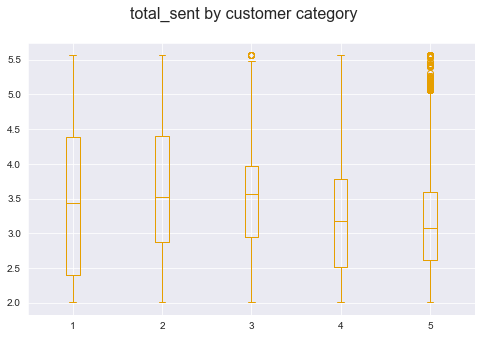

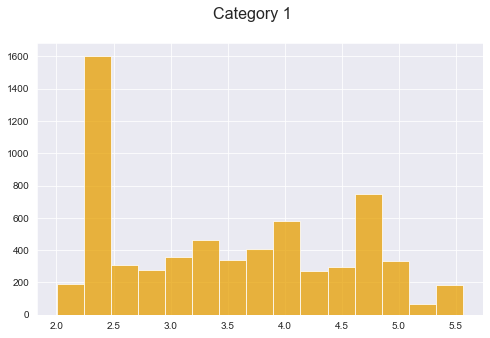

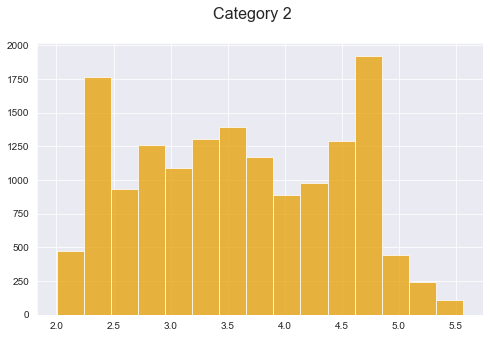

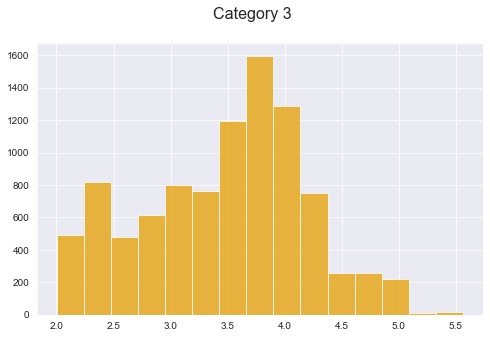

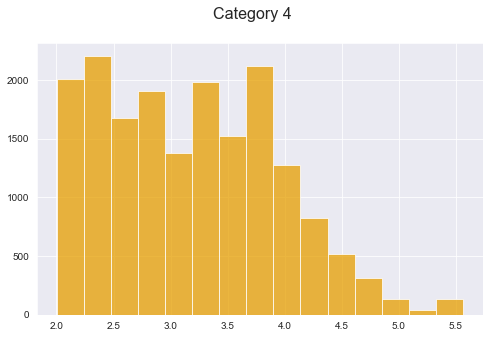

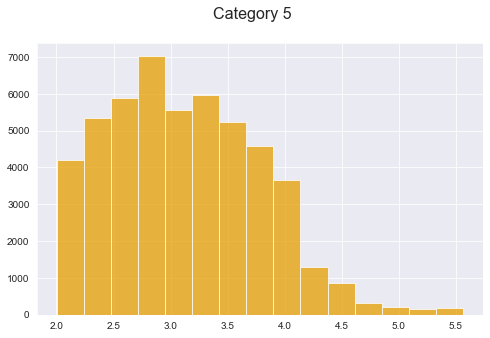

In [27]:
main_model_eda.bivariate_plotter('total_sent')

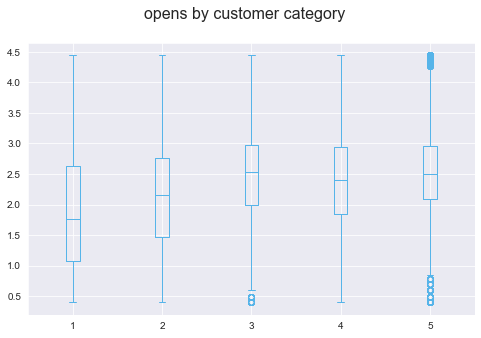

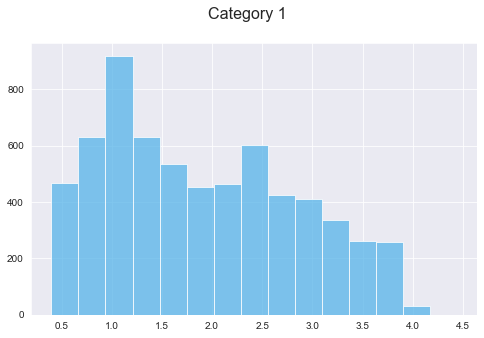

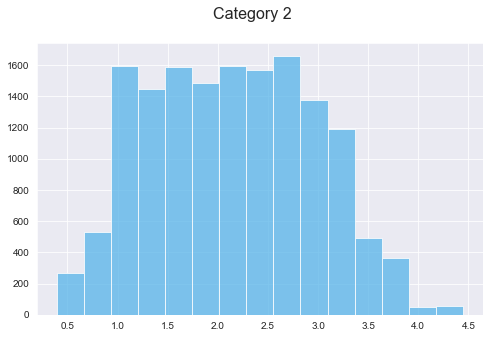

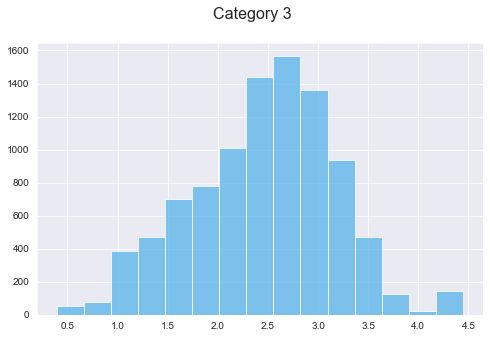

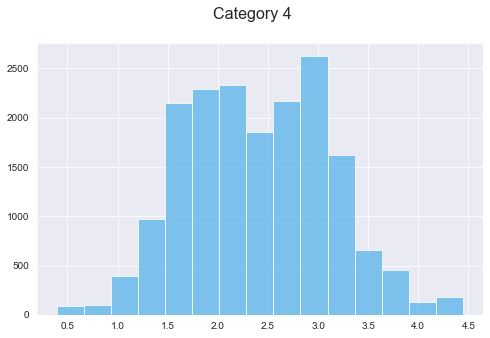

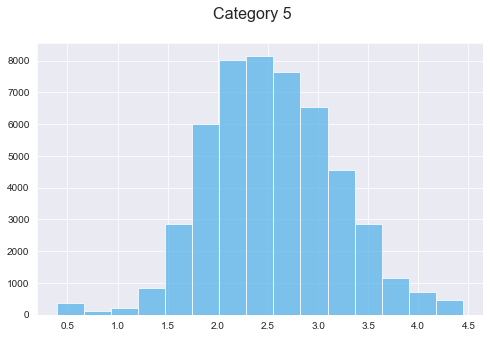

In [28]:
main_model_eda.bivariate_plotter('opens')

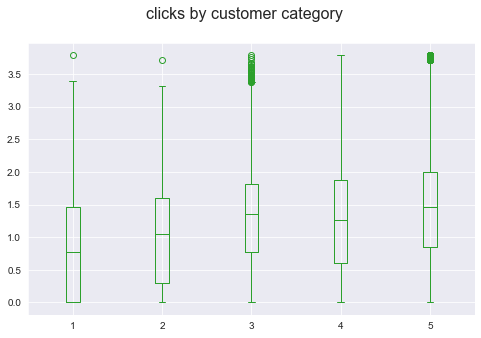

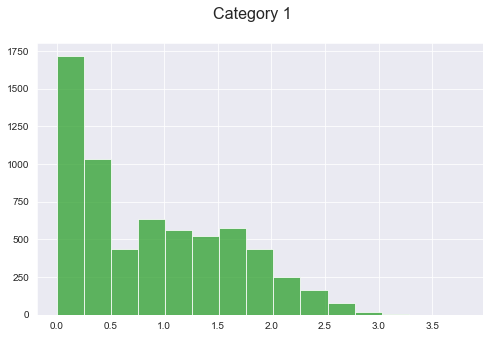

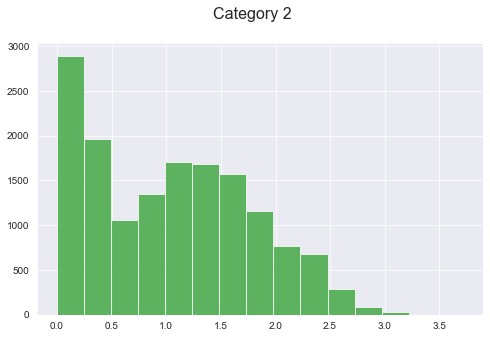

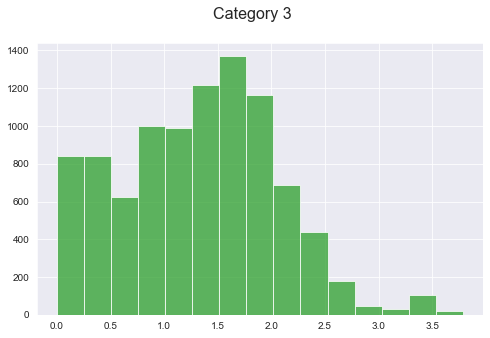

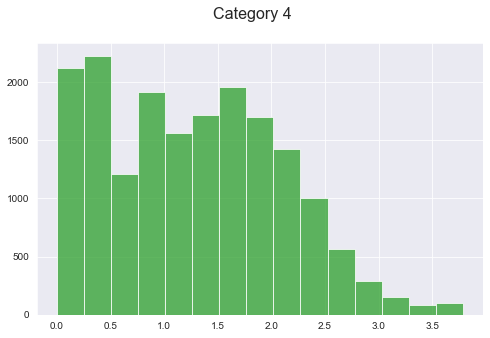

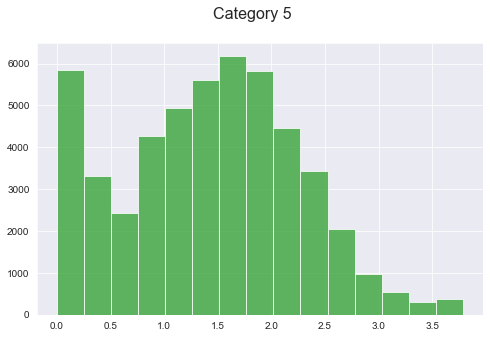

In [29]:
main_model_eda.bivariate_plotter('clicks')

In [30]:
# Saving file

main_model_eda.save_final_df('../../../datasets/output/sample_01/', 'output_01.csv')